
Classification



Dataset : https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep

## Install Lib

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Load Data and Preprocessing

In [ ]:
import pandas as pd
import sweetviz as sv

In [ ]:
cols = ['snoring_rate',
'respiration_rate',
'body_temperature',
'limb_movement',
'blood_oxygen',
'eye_movement',
'sleeping_hours',
'heart_rate',
'stress_level']

In [ ]:
df = pd.read_csv("SaYoPillow.csv")
df.columns = cols
df.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [ ]:
df.shape

(630, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      630 non-null    float64
 1   respiration_rate  630 non-null    float64
 2   body_temperature  630 non-null    float64
 3   limb_movement     630 non-null    float64
 4   blood_oxygen      630 non-null    float64
 5   eye_movement      630 non-null    float64
 6   sleeping_hours    630 non-null    float64
 7   heart_rate        630 non-null    float64
 8   stress_level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [ ]:
df.isnull().sum()

snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleeping_hours      0
heart_rate          0
stress_level        0
dtype: int64

In [ ]:
df[df['stress_level']==0].count()
df[df['stress_level']==1].count()
df[df['stress_level']==2].count()
df[df['stress_level']==3].count()
df[df['stress_level']==4].count()

snoring_rate        126
respiration_rate    126
body_temperature    126
limb_movement       126
blood_oxygen        126
eye_movement        126
sleeping_hours      126
heart_rate          126
stress_level        126
dtype: int64

In [ ]:
df.groupby('stress_level').count()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate
stress_level,,,,,,,,
0,126,126,126,126,126,126,126,126
1,126,126,126,126,126,126,126,126
2,126,126,126,126,126,126,126,126
3,126,126,126,126,126,126,126,126
4,126,126,126,126,126,126,126,126


Melakukan Cek Imbalance/Balance pada data

In [ ]:
kelas0 = 126/630
kelas0

0.2

In [ ]:
kelas1 = 126/630
kelas1

0.2

In [ ]:
kelas2 = 126/630
kelas2

0.2

In [ ]:
kelas3 = 126/630
kelas3

0.2

In [ ]:
kelas4 = 126/630
kelas4

0.2

Data sudah **BALANCED**, karena semua kelas memiliki persentase 20% balanced 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa5c6e84d0>,
      dtype=object)

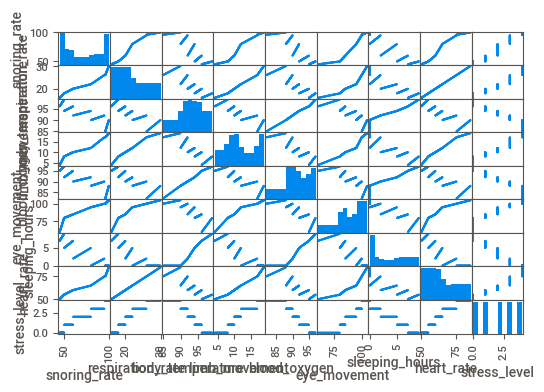

In [ ]:
#Visualisasi
from pandas.plotting import scatter_matrix 
scatter_matrix(df)

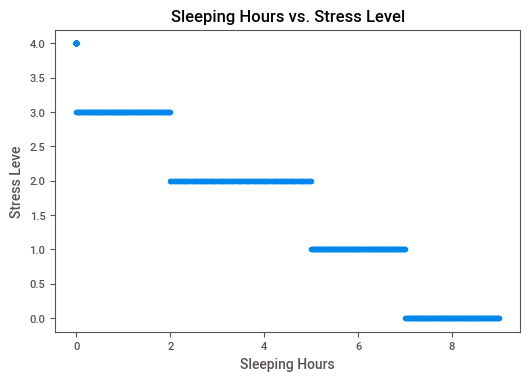

In [ ]:
import matplotlib.pyplot as plt
plt.title('Sleeping Hours vs. Stress Level')
plt.xlabel('Sleeping Hours')
plt.ylabel('Stress Leve')
plt.scatter(df['sleeping_hours'], df['stress_level'])
plt.show()

In [ ]:
#Menentukan variabel independen dan dependen
x = df.drop('stress_level',axis=1)
y = df.stress_level

In [ ]:
#Lakukan praproses dalam hal ini akan dilakukan normalisasi min-max
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(x)

In [ ]:
#Split data menjadi data training dan data testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(rescaledX, y, train_size = 0.8, random_state = 0)
print(x_train.shape, x_test.shape)

(504, 8) (126, 8)


In [ ]:
#print data fitur setelah di normalisasi
rescaledX

array([[0.88727273, 0.69142857, 0.48857143, ..., 0.88      , 0.20444444,
        0.69142857],
       [0.848     , 0.65028571, 0.468     , ..., 0.864     , 0.17244444,
        0.65028571],
       [0.27272727, 0.28571429, 0.78571429, ..., 0.55555556, 0.77777778,
        0.28571429],
       ...,
       [0.95461818, 0.82171429, 0.13428571, ..., 0.93066667, 0.        ,
        0.82171429],
       [0.248     , 0.26628571, 0.76628571, ..., 0.54044444, 0.74755556,
        0.26628571],
       [0.52581818, 0.38514286, 0.59942857, ..., 0.71022222, 0.45422222,
        0.38514286]])

#EDA

In [ ]:
df_train = pd.DataFrame(x_train, columns=x.columns).reset_index(drop=True)
df_train['stress_level'] = y_train.values
df_train['stress_level'] = df_train['stress_level'].astype('float')

df_test = pd.DataFrame(x_test, columns=x.columns).reset_index(drop=True)
df_test['stress_level'] = y_test.values
df_test['stress_level'] = df_test['stress_level'].astype('float')

                                             |          | [  0%]   00:00 -> (? left)


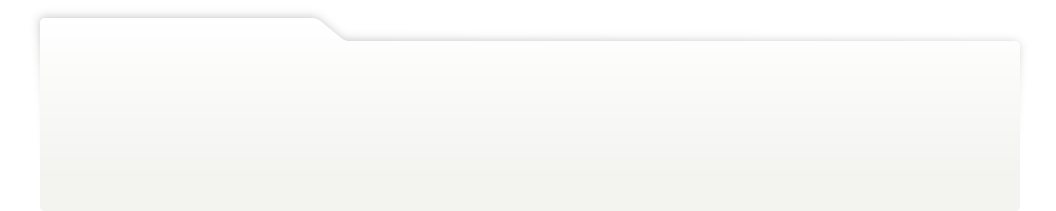
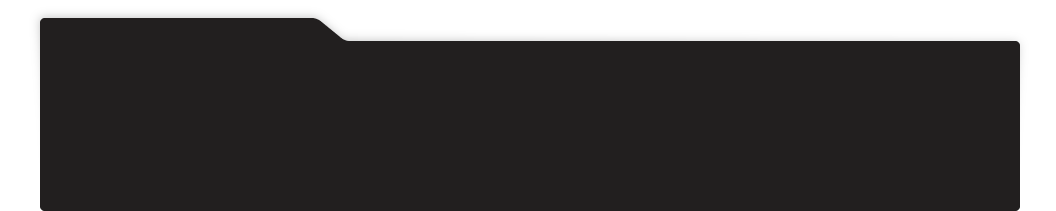
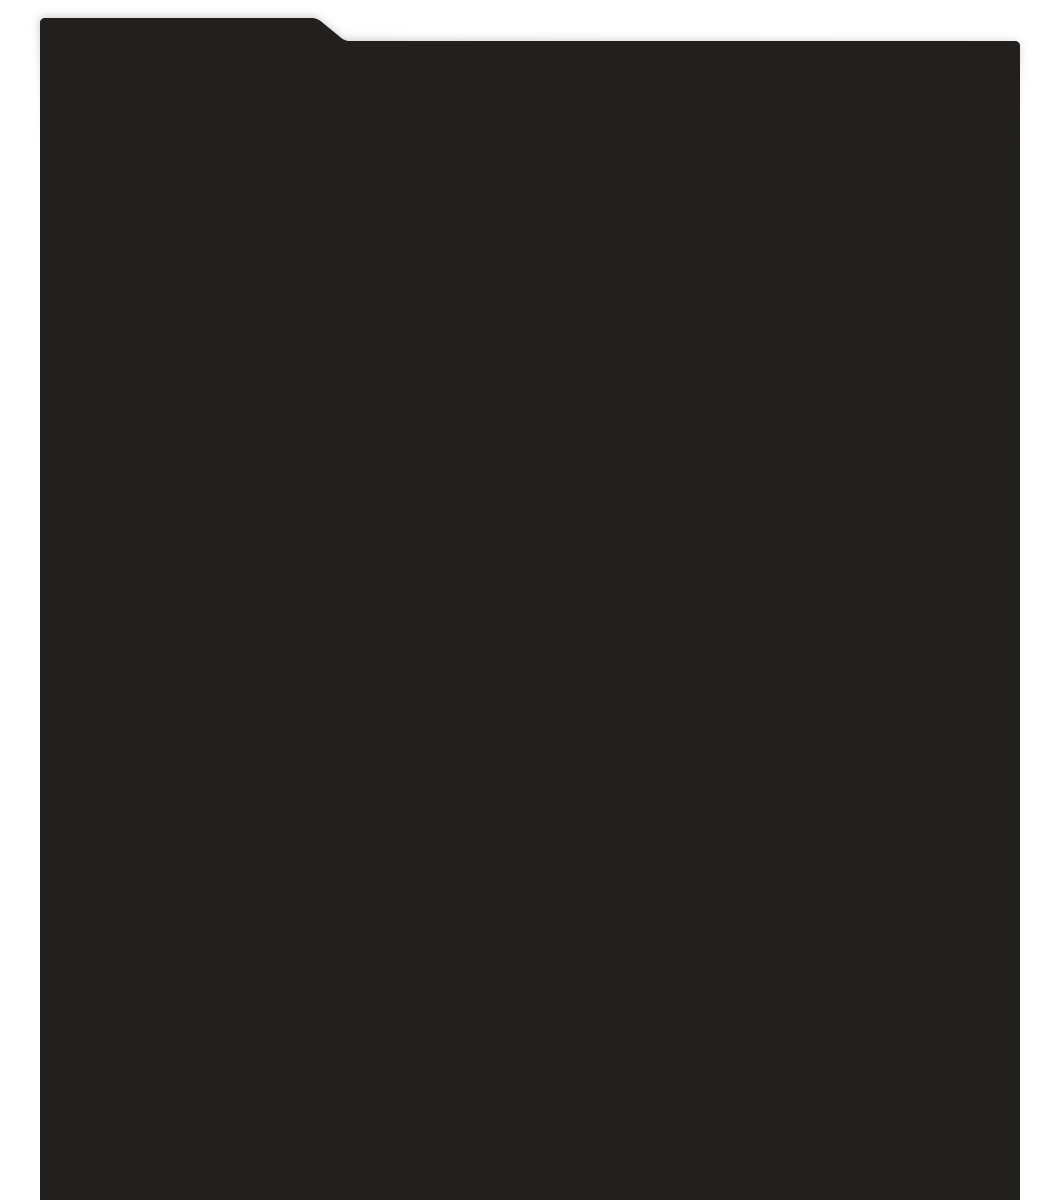
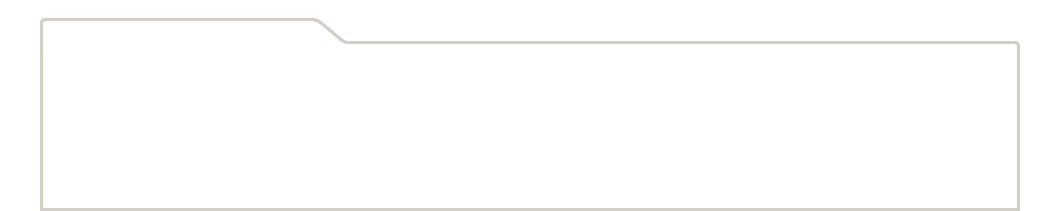
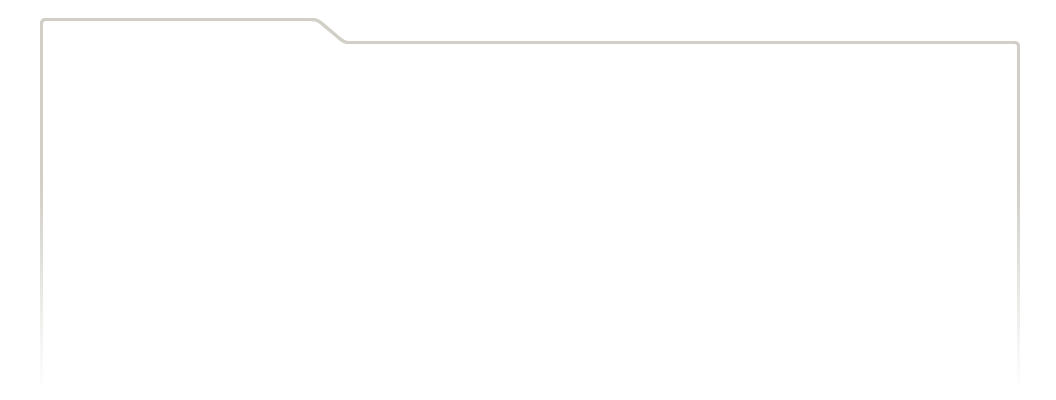
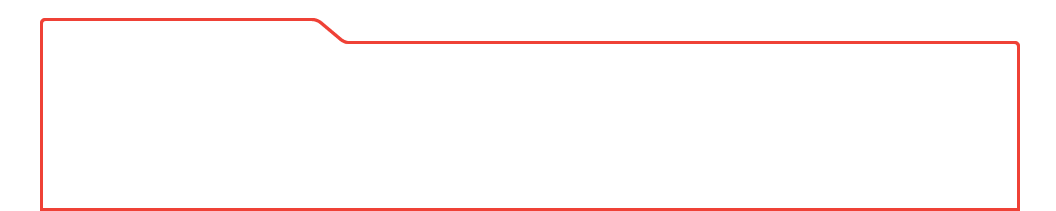
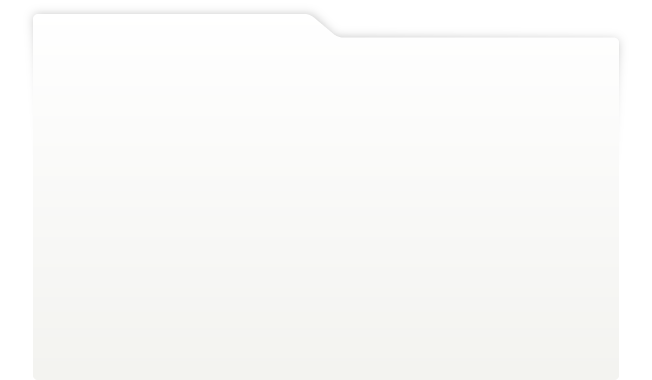
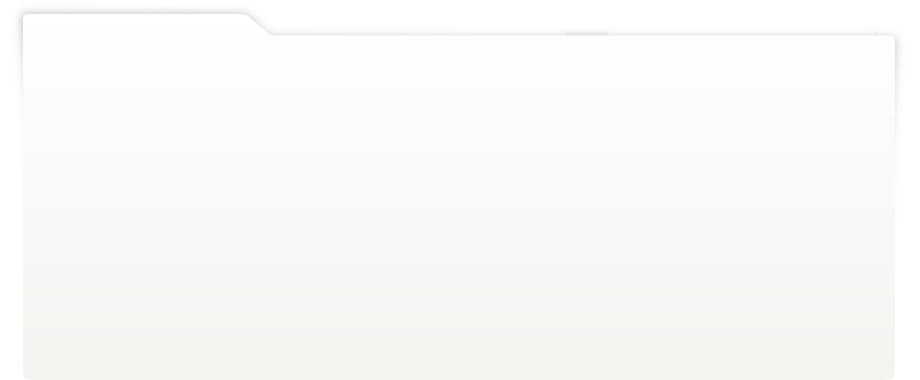
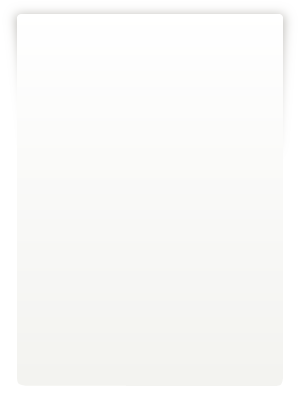
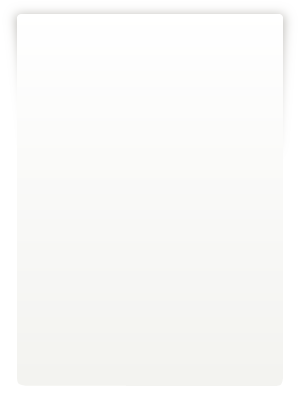
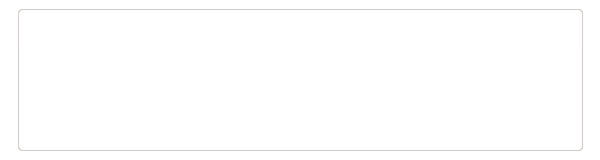
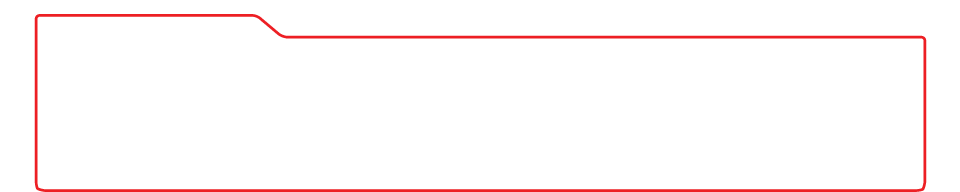
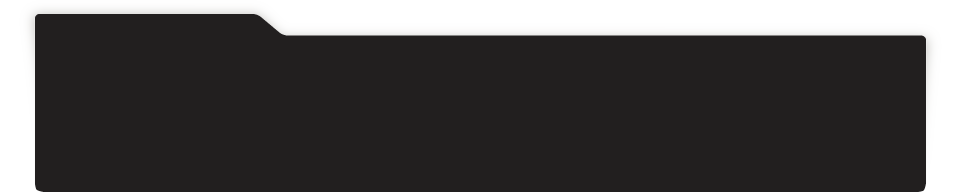
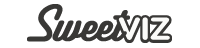
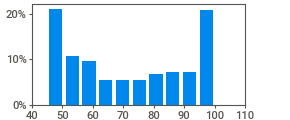
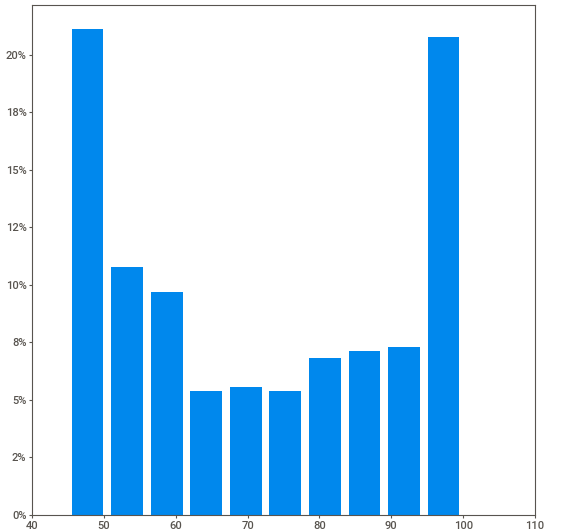
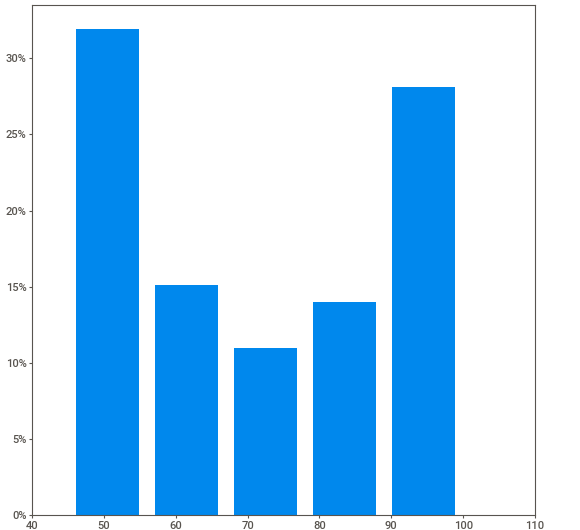
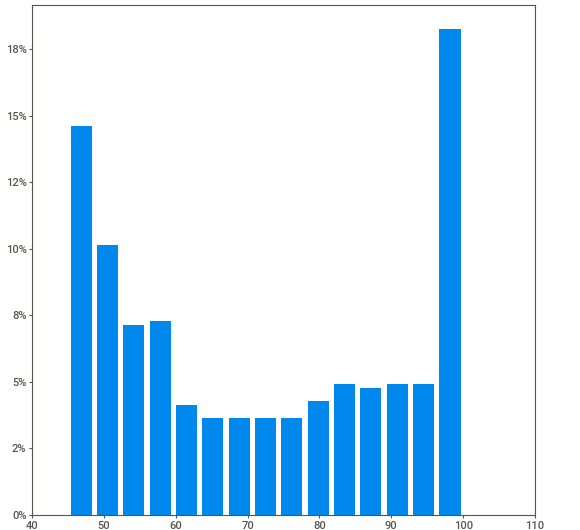
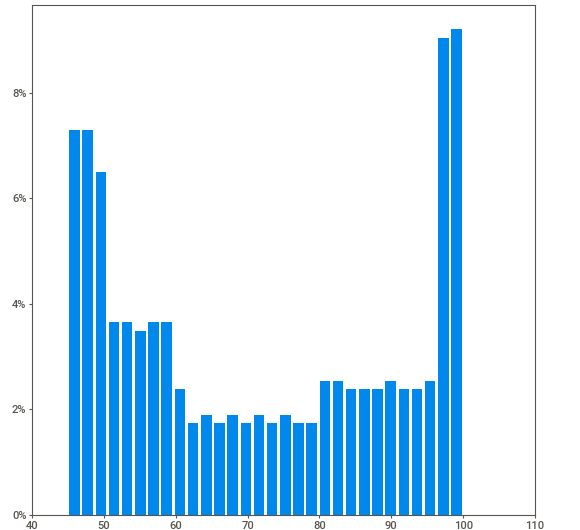
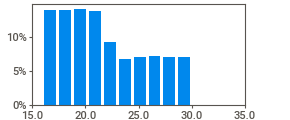
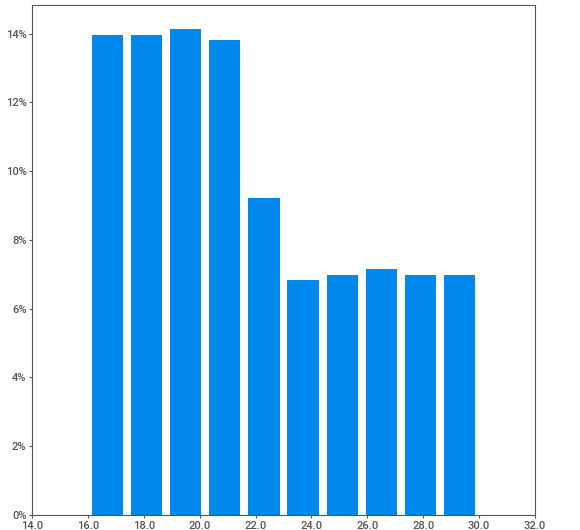
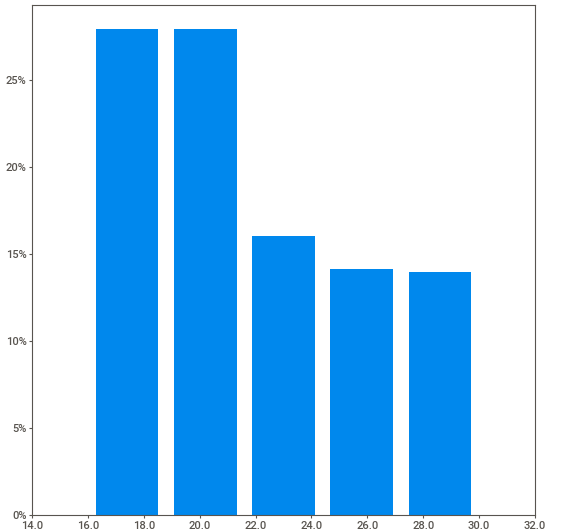
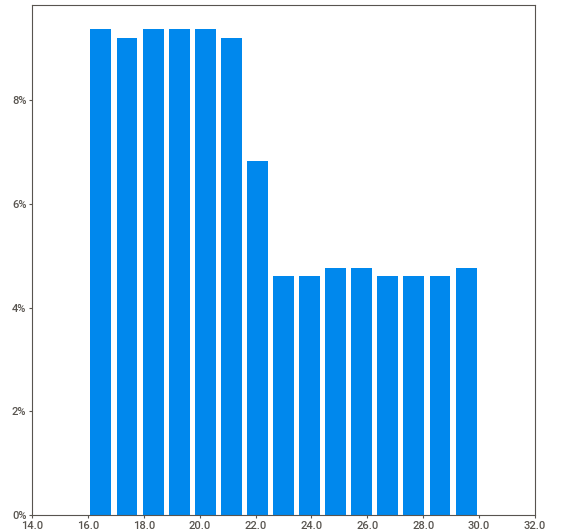
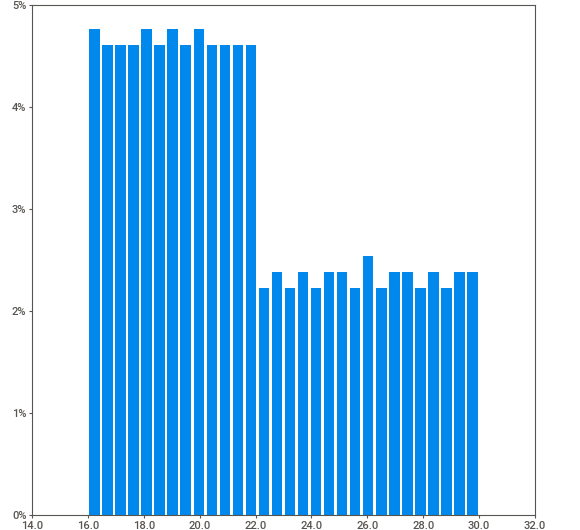
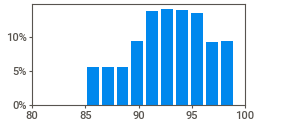
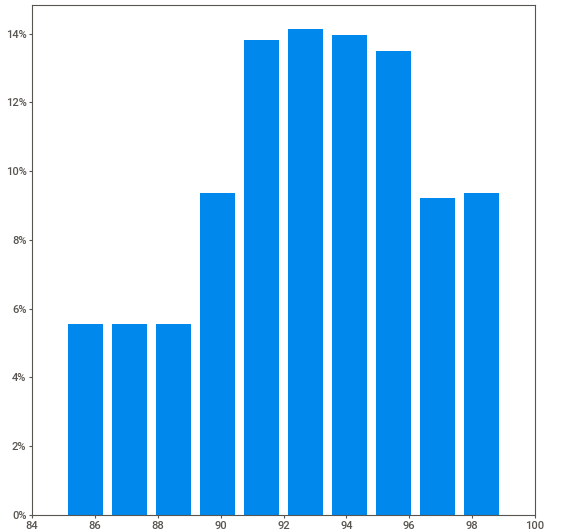
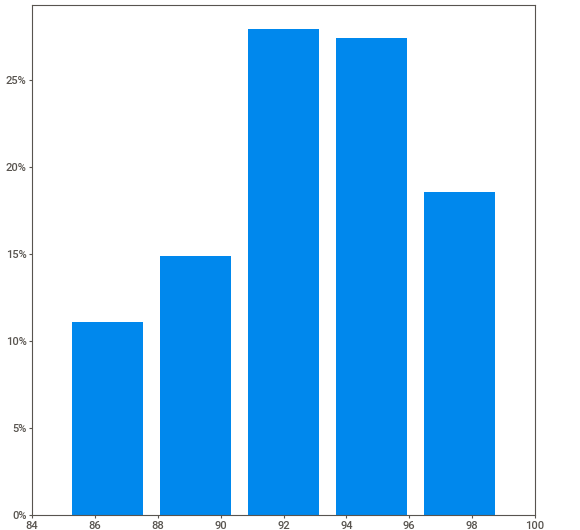
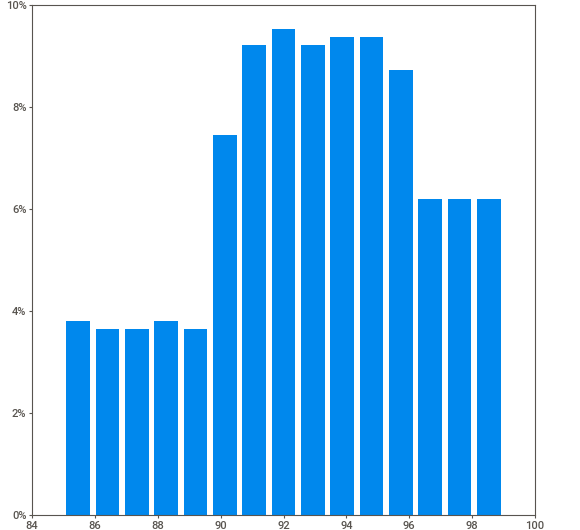
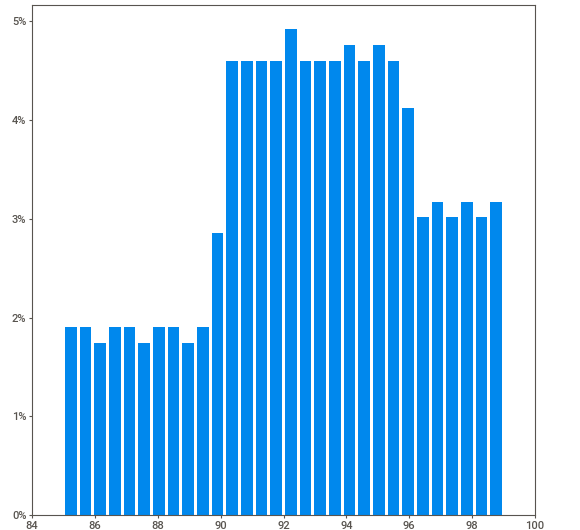
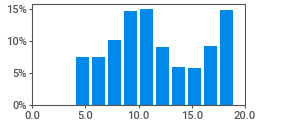
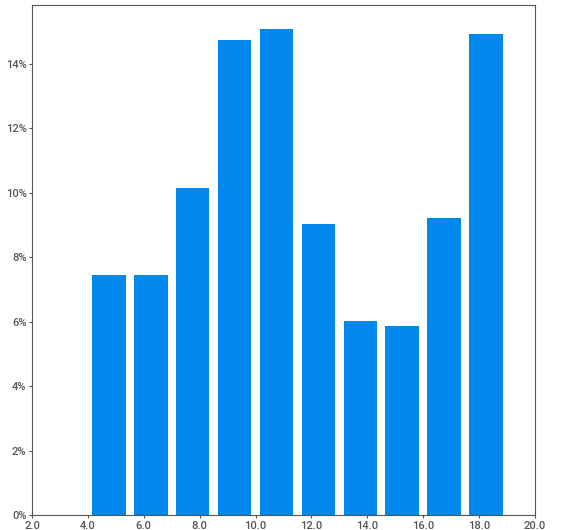
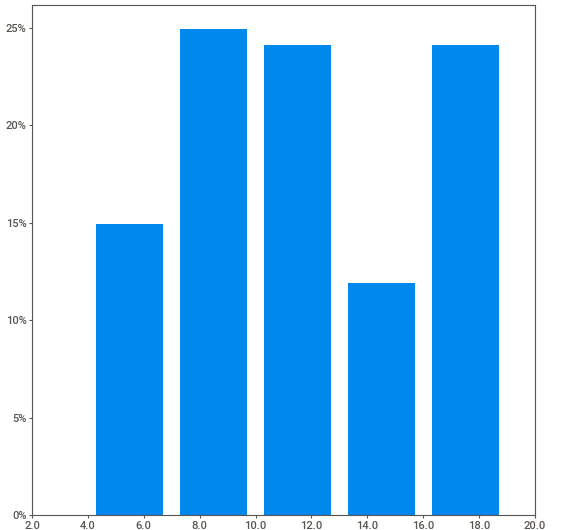
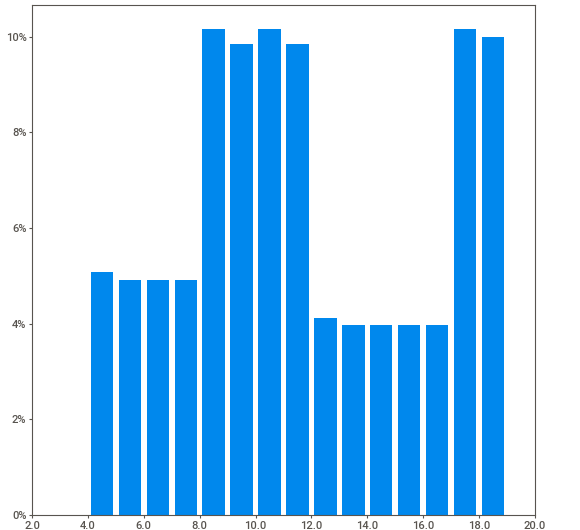
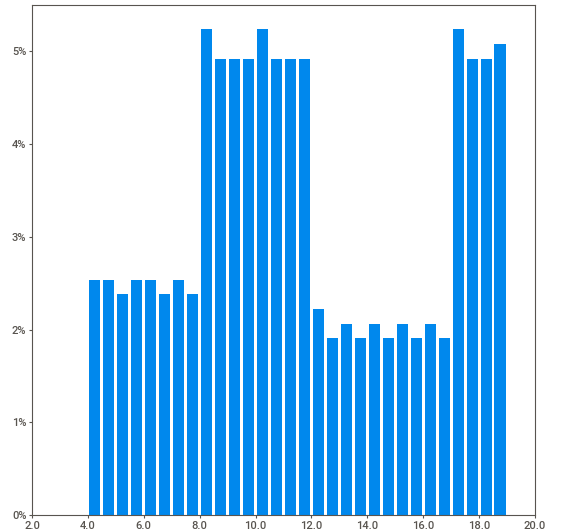
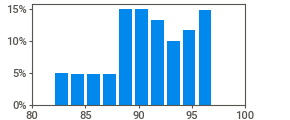
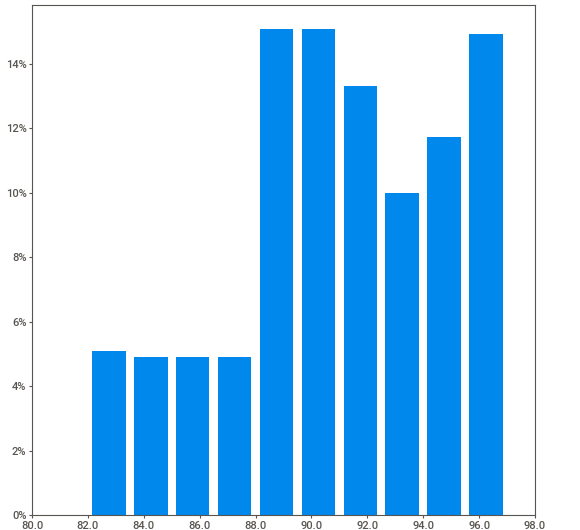
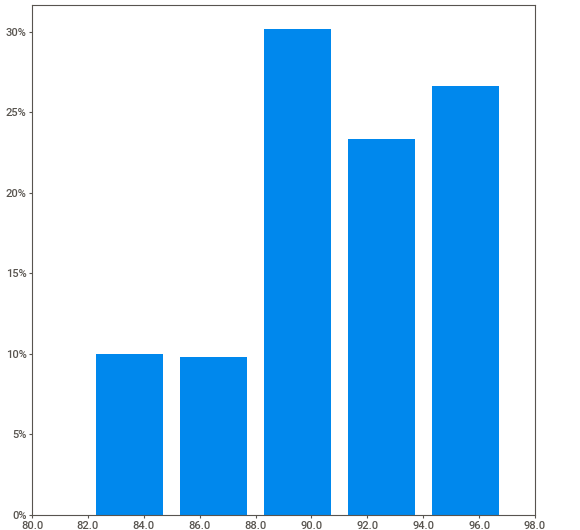
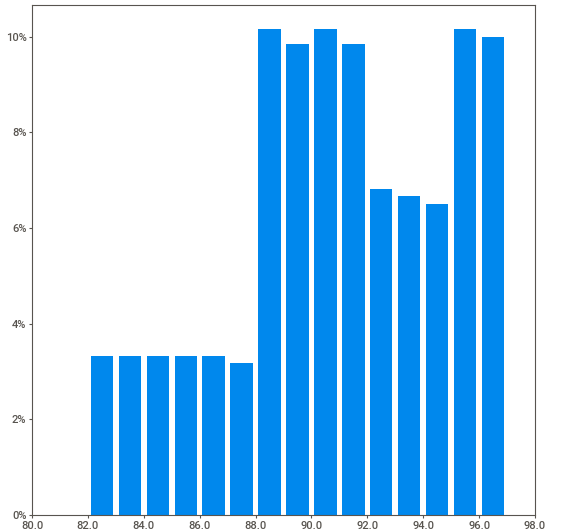
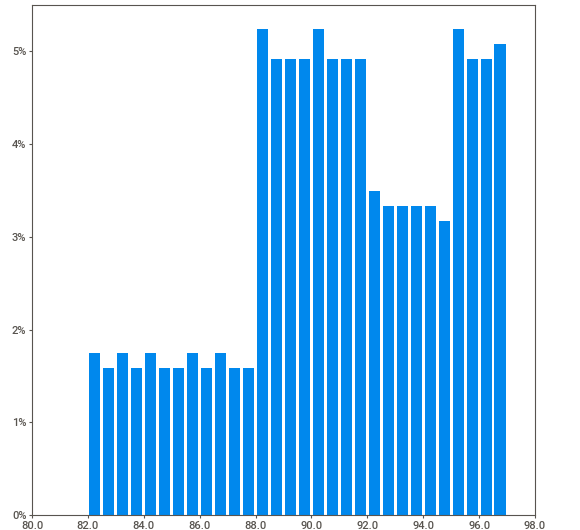
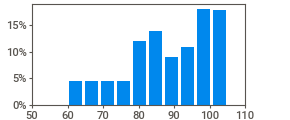
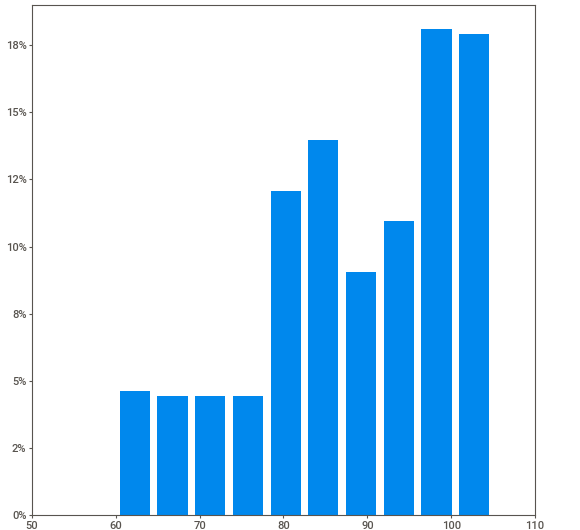
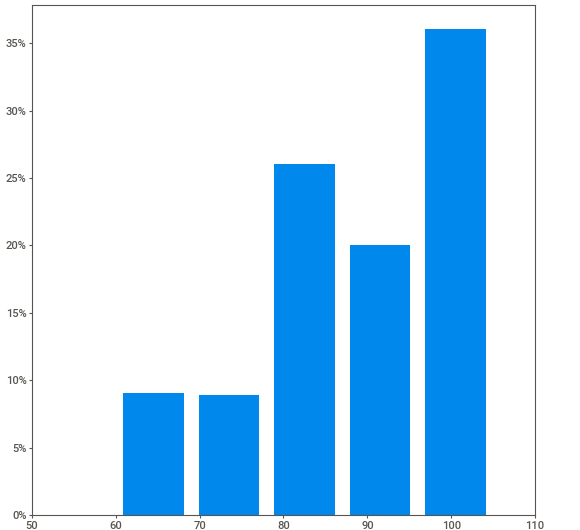
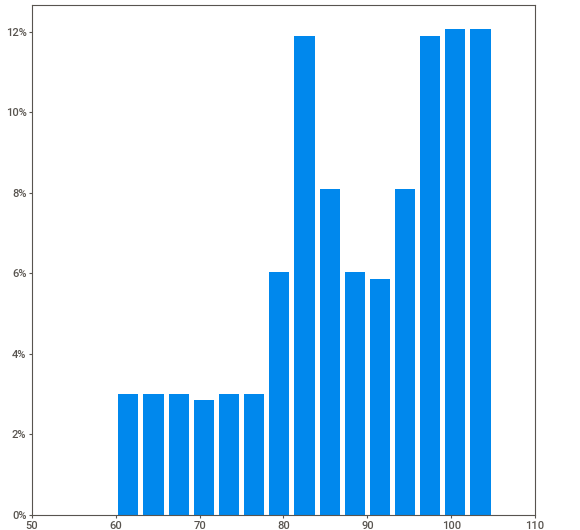
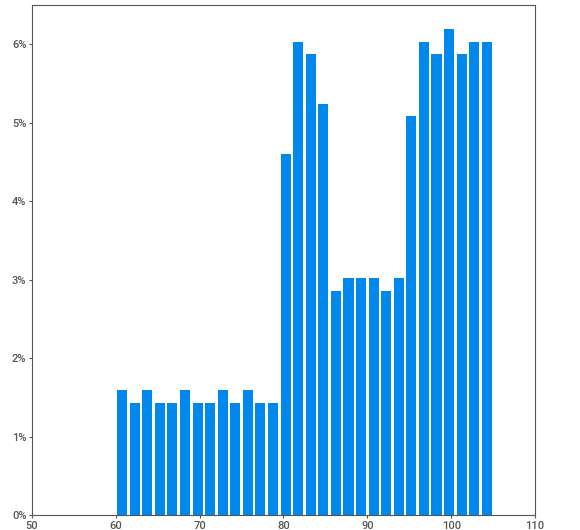
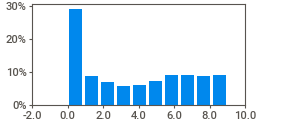
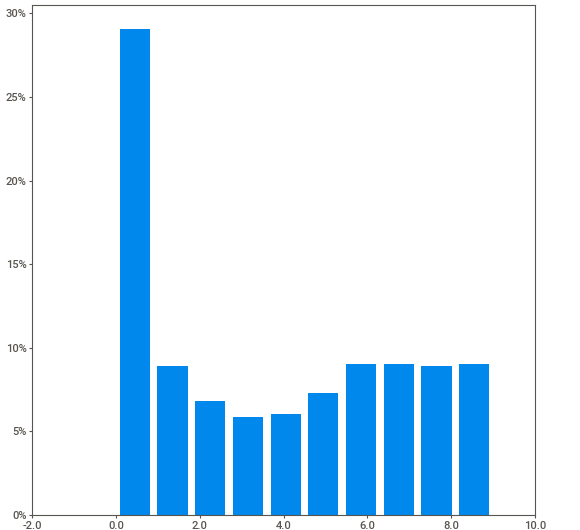
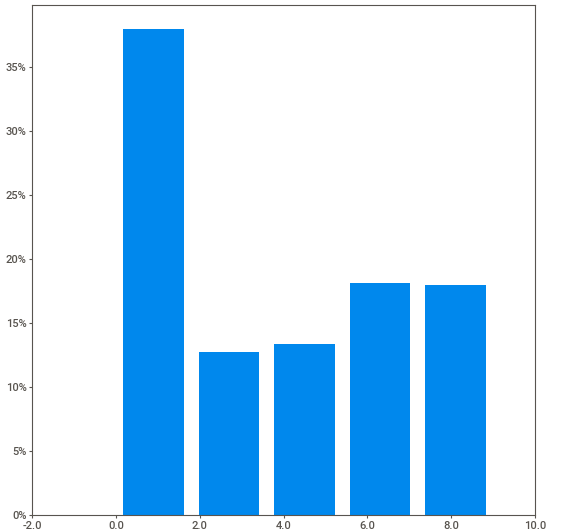
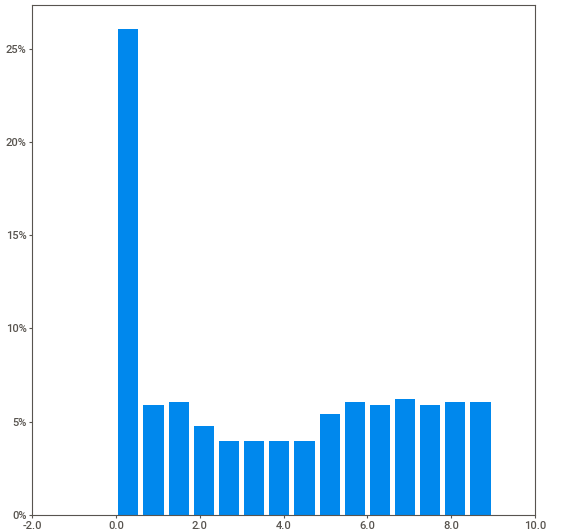
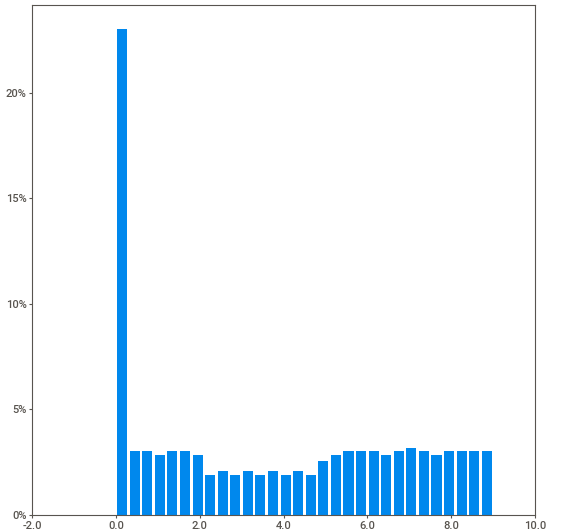
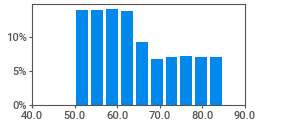
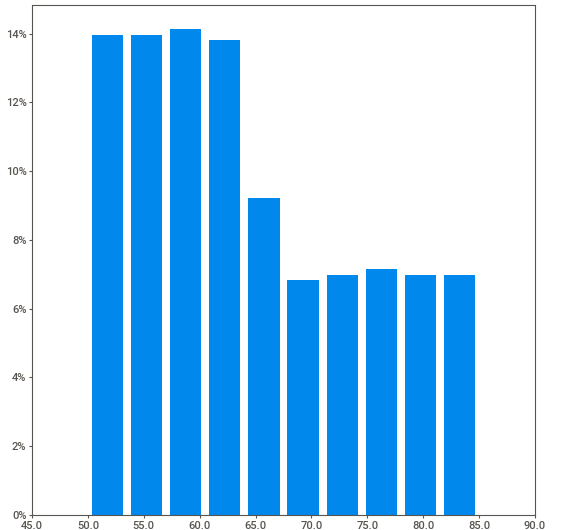
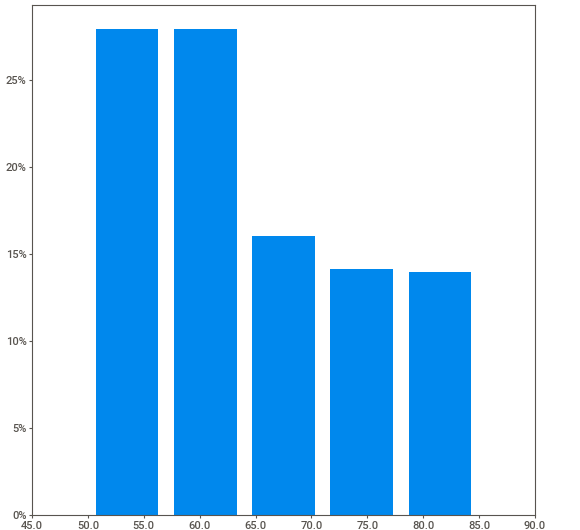
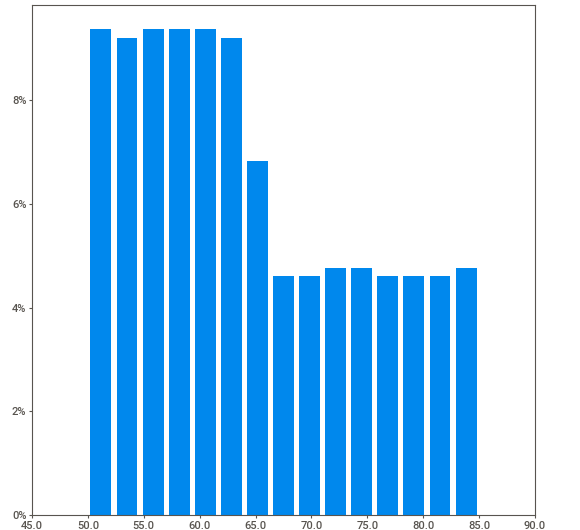
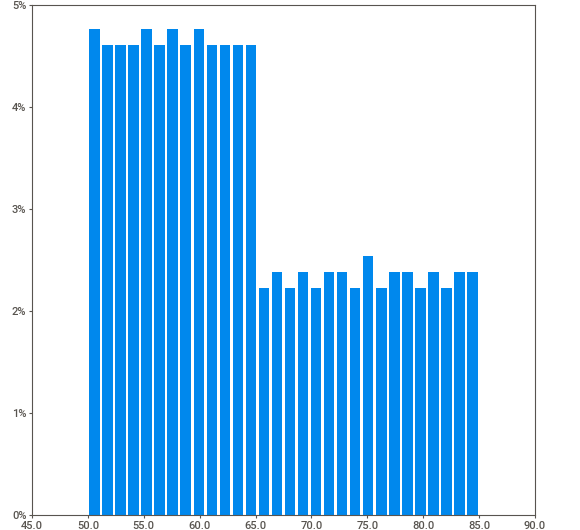
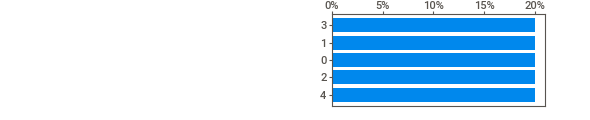
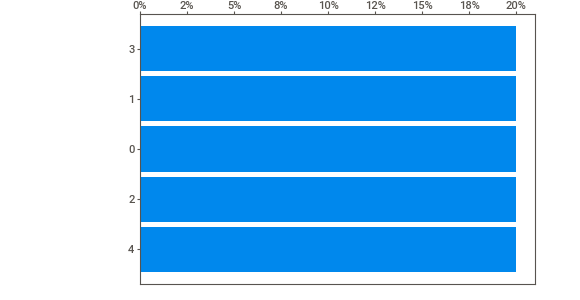
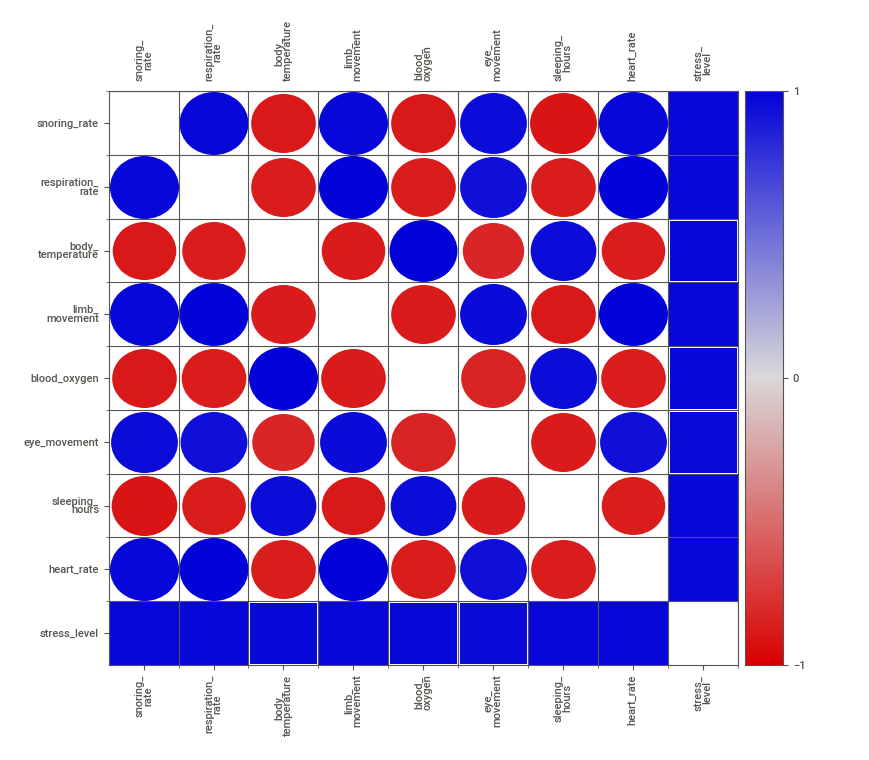
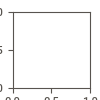

In [ ]:
report = sv.analyze(df)
report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


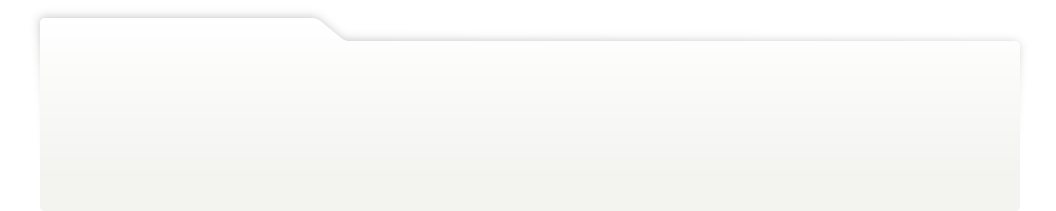
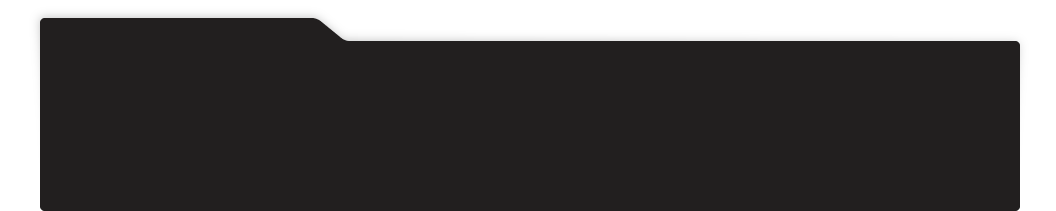
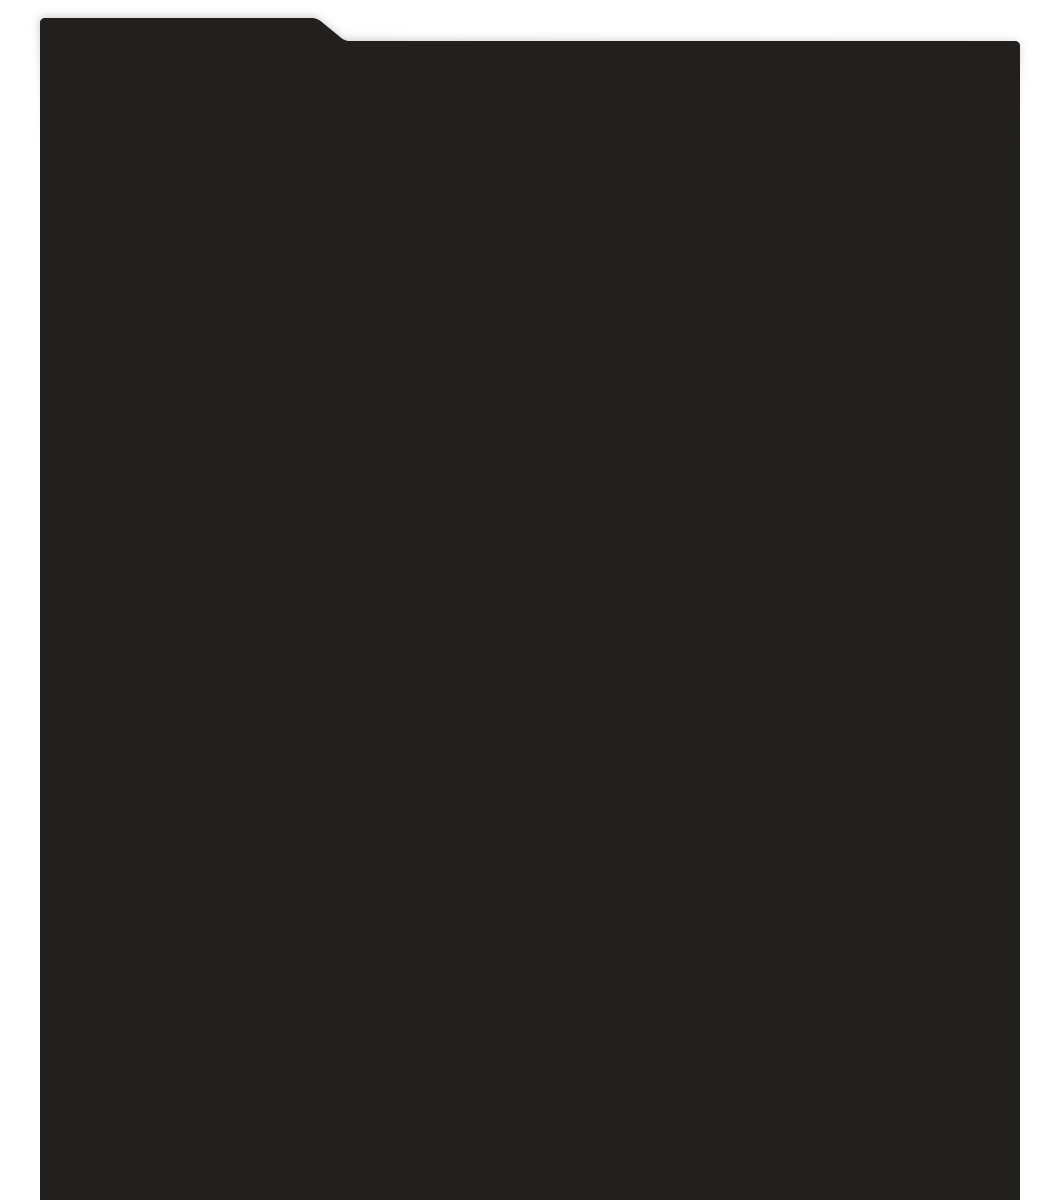
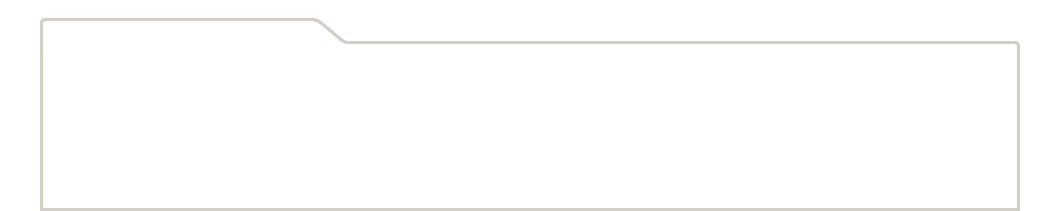
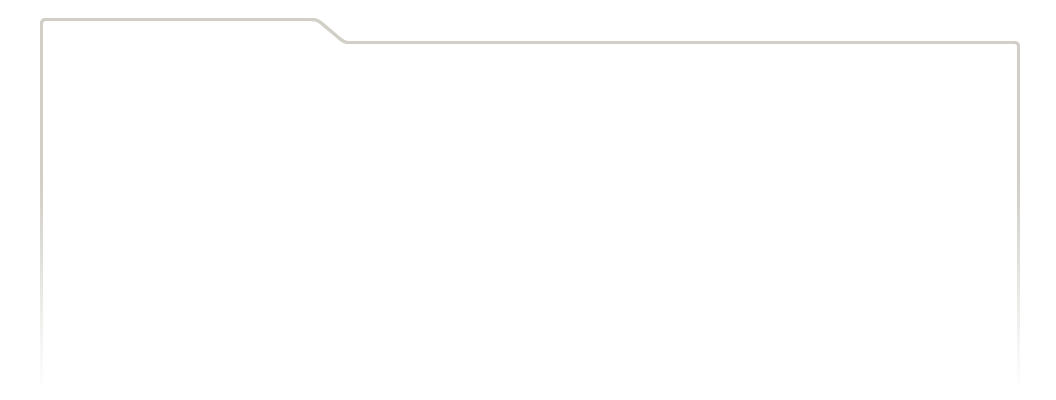
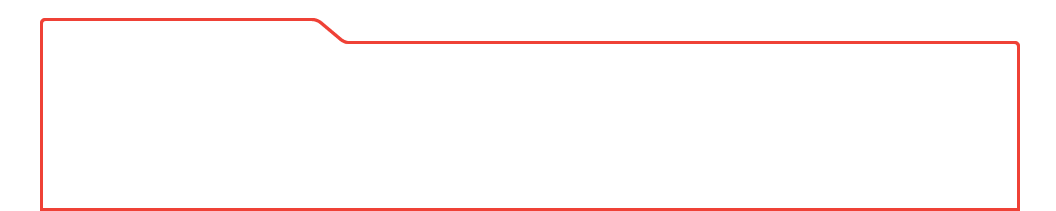
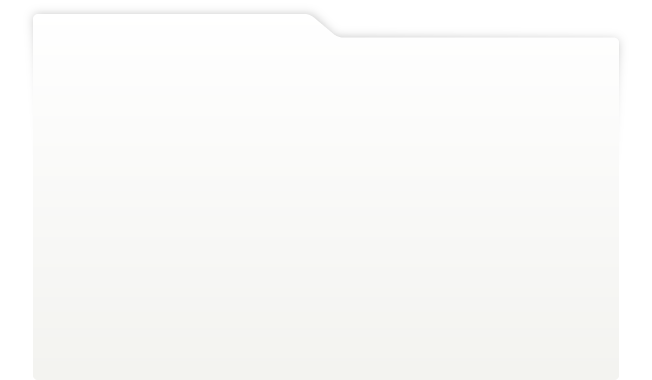
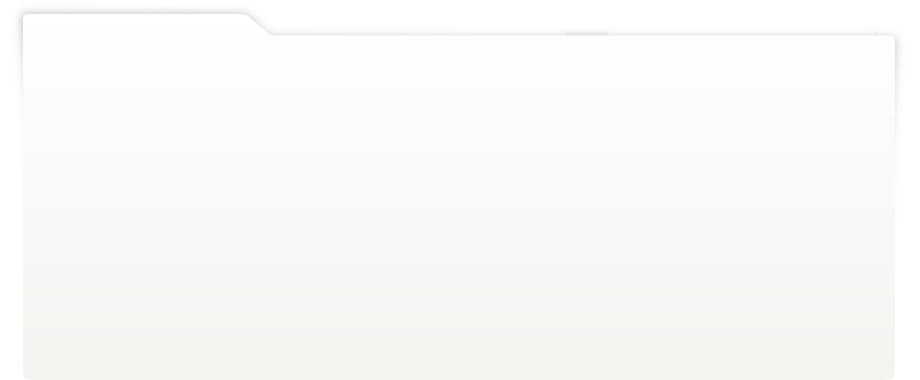
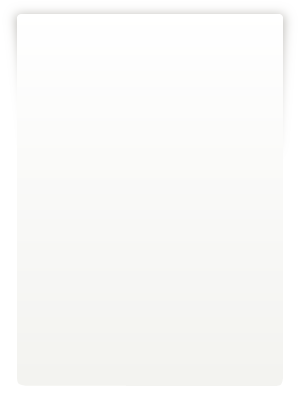
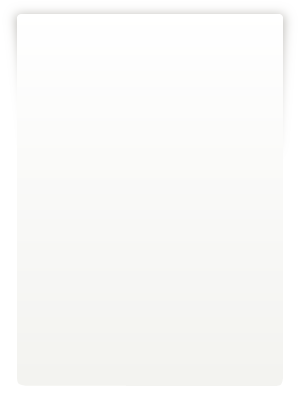
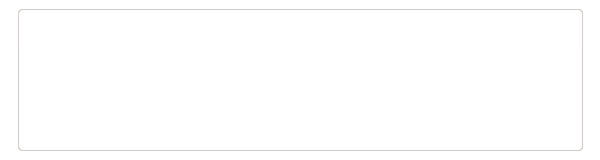
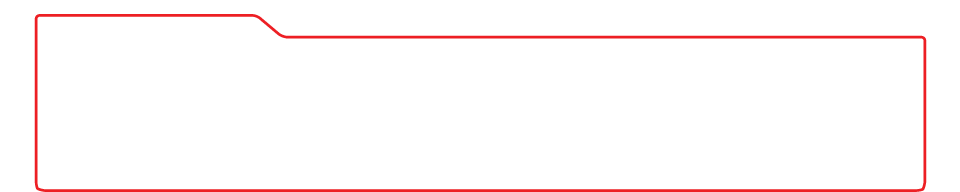
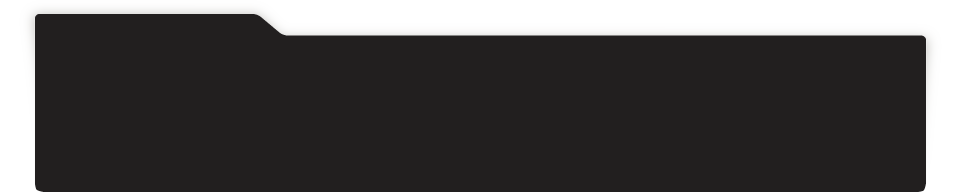
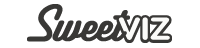
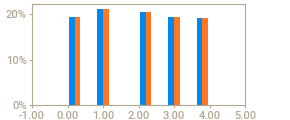
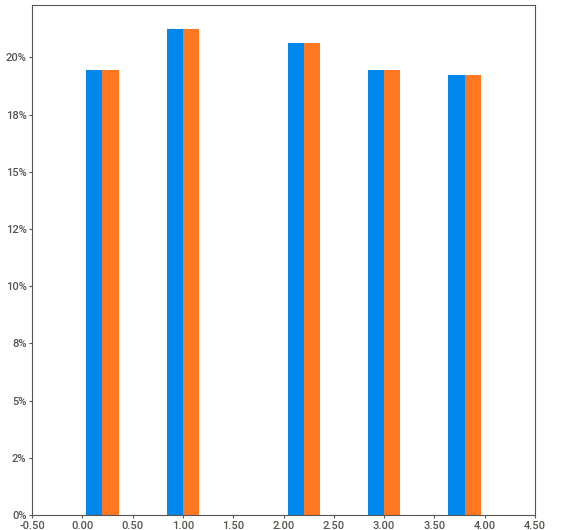
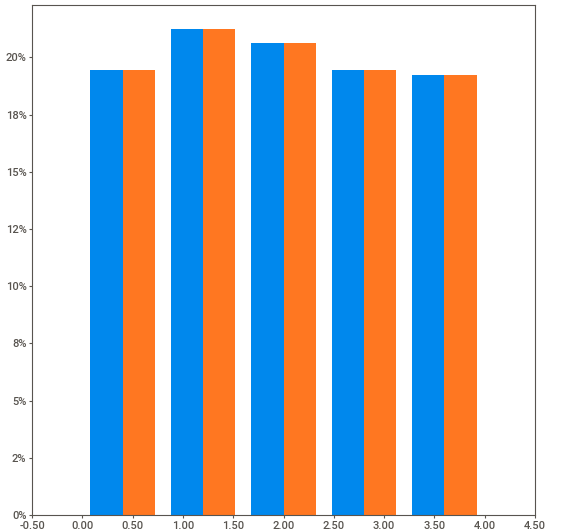
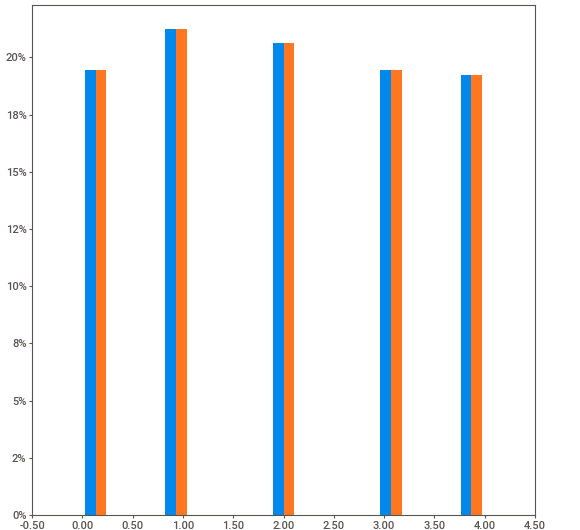
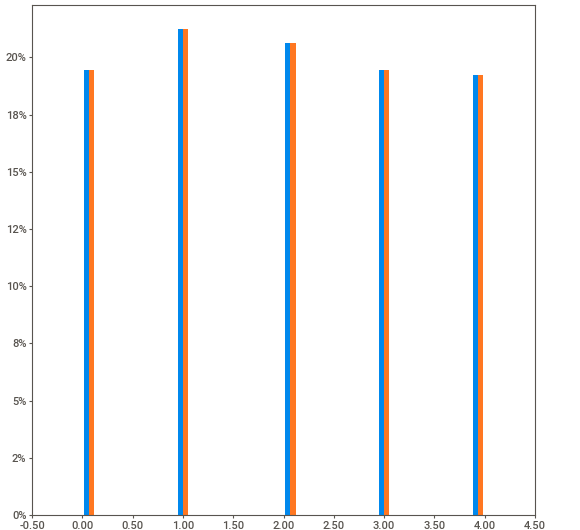
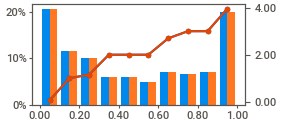
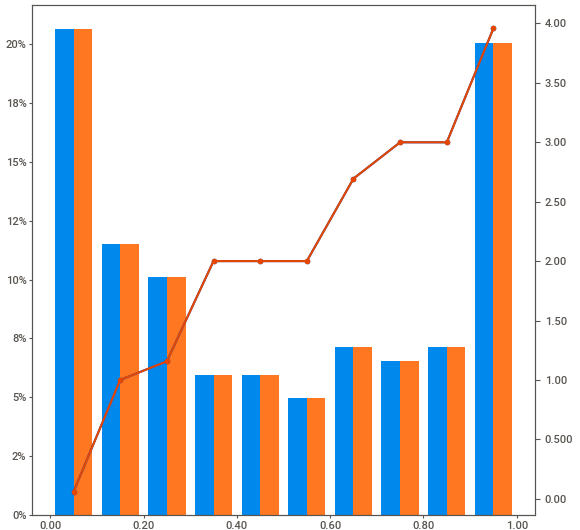
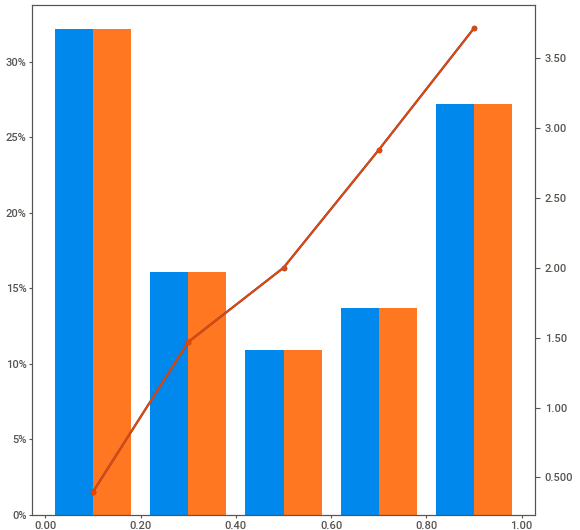
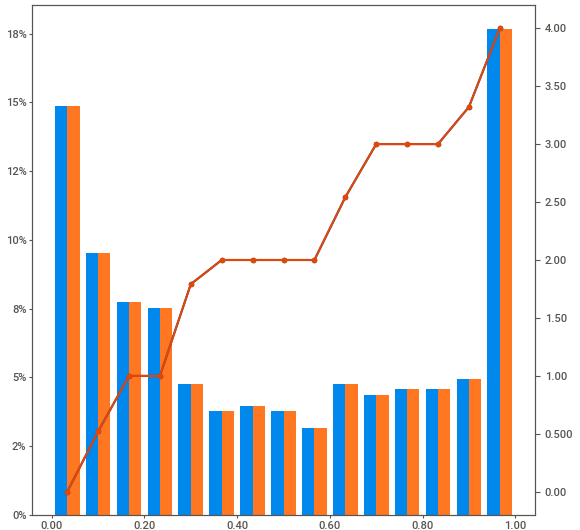
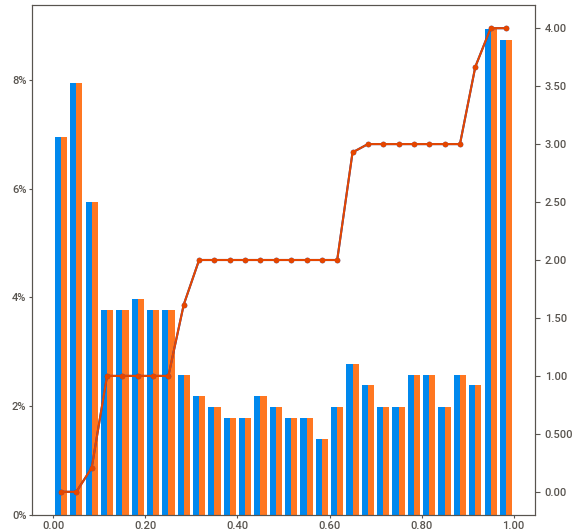
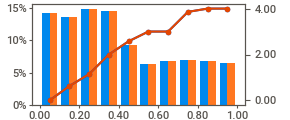
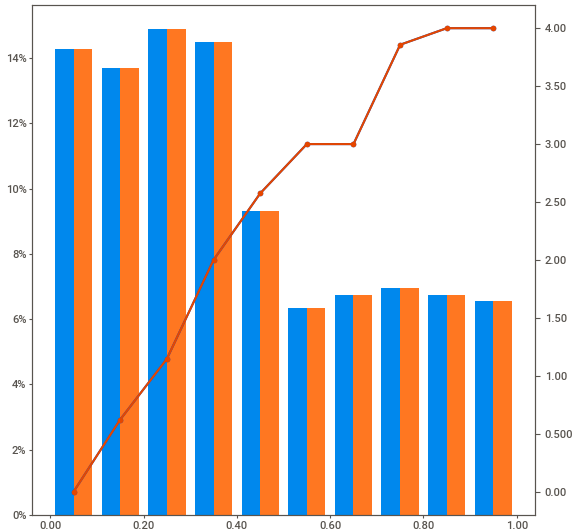
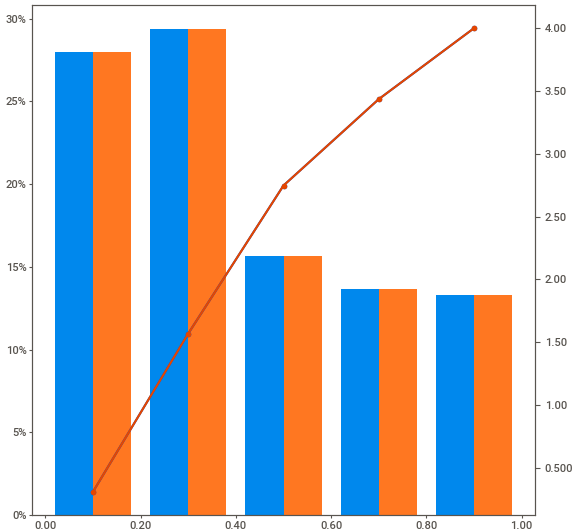
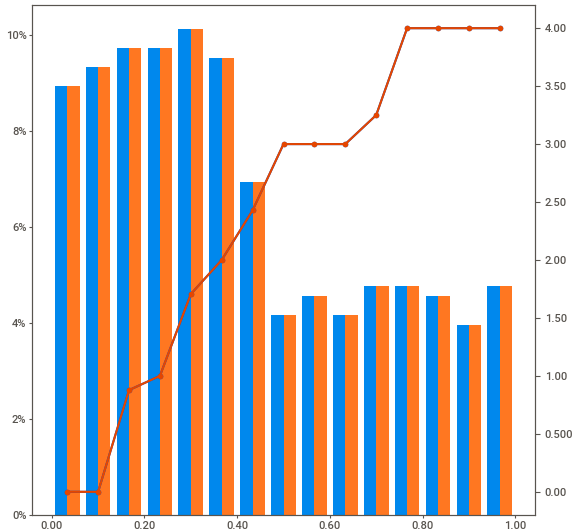
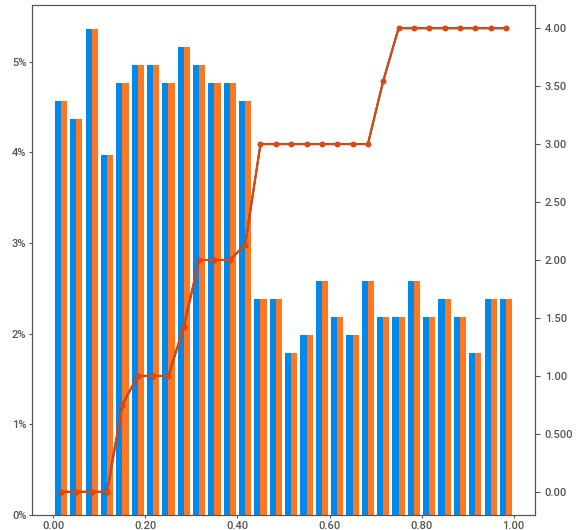
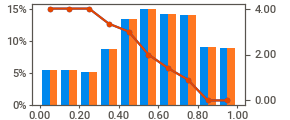
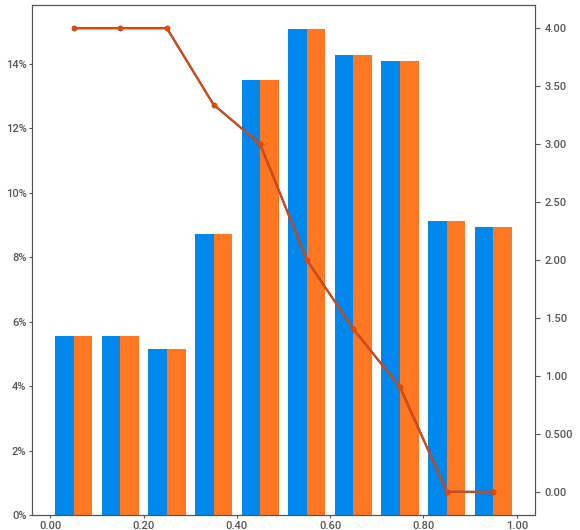
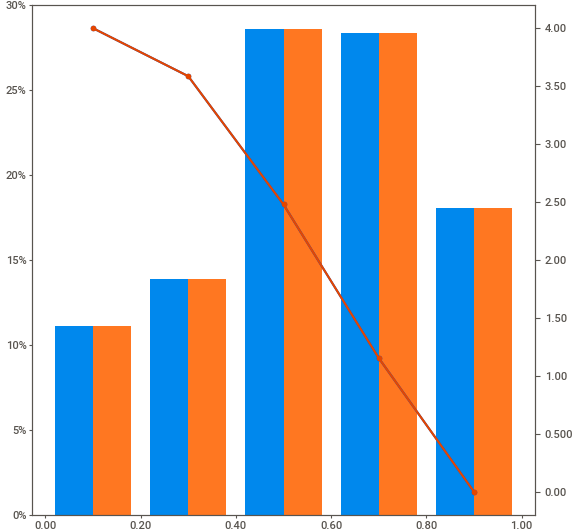
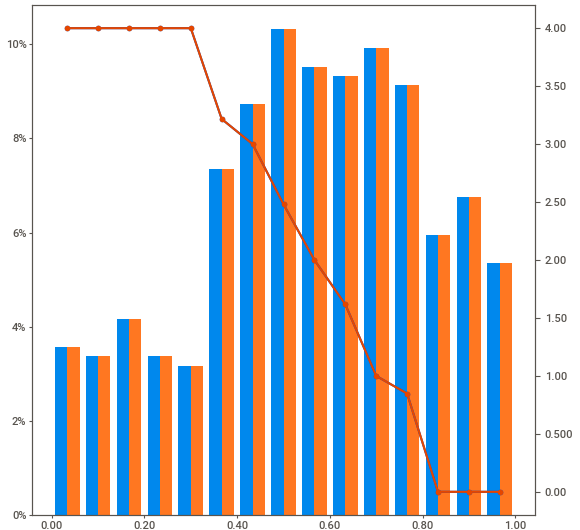
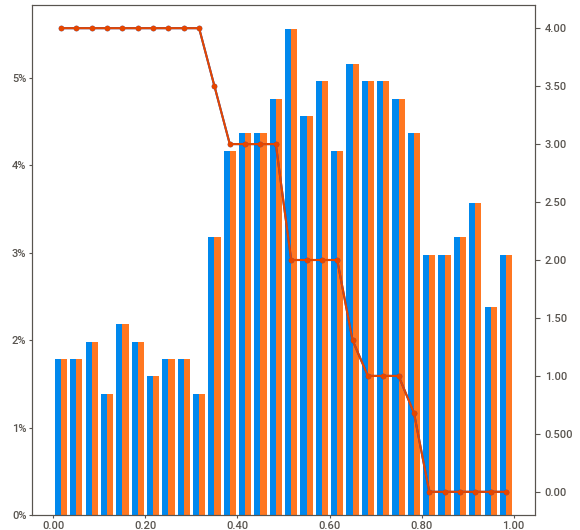
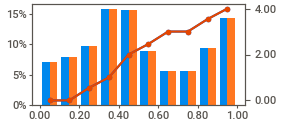
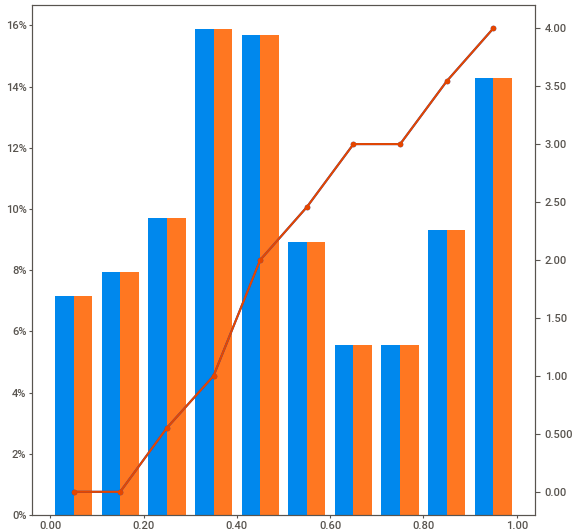
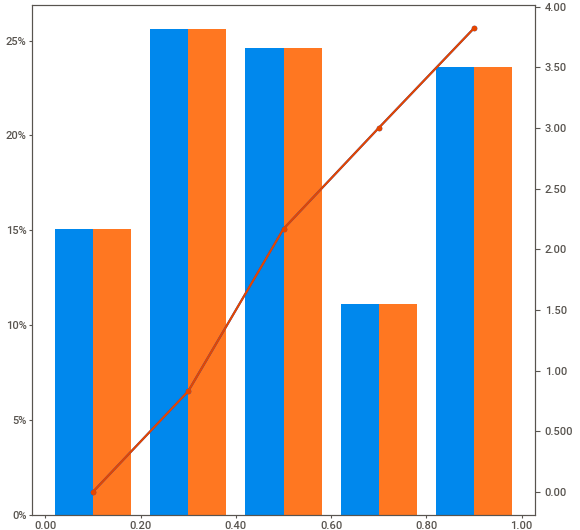
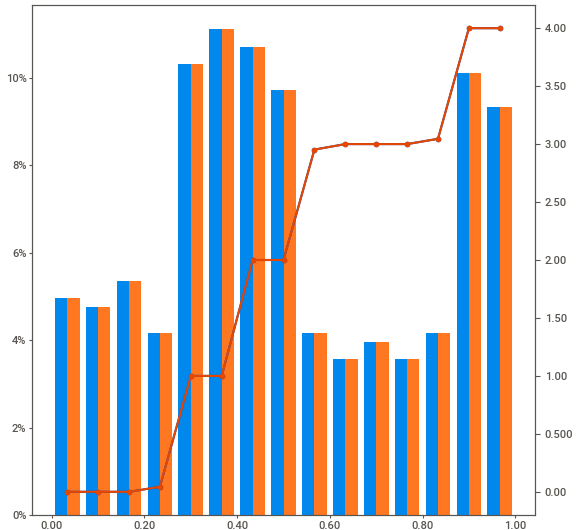
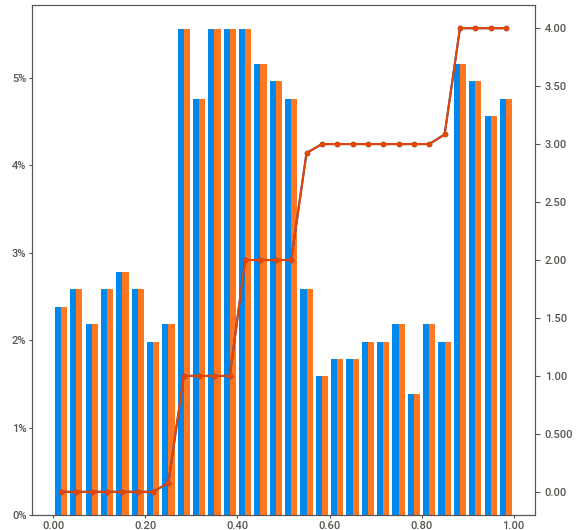
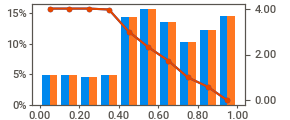
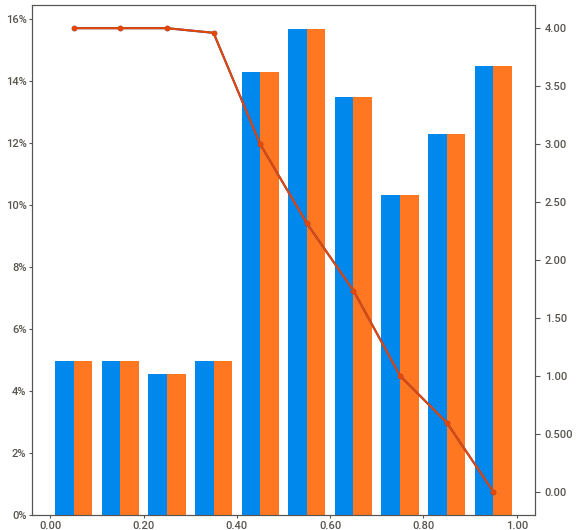
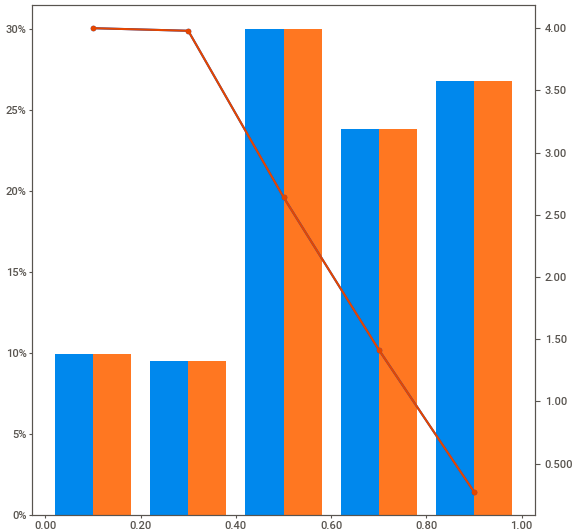
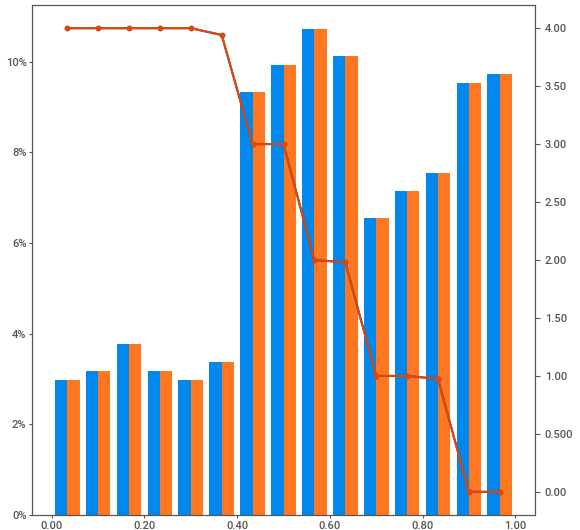
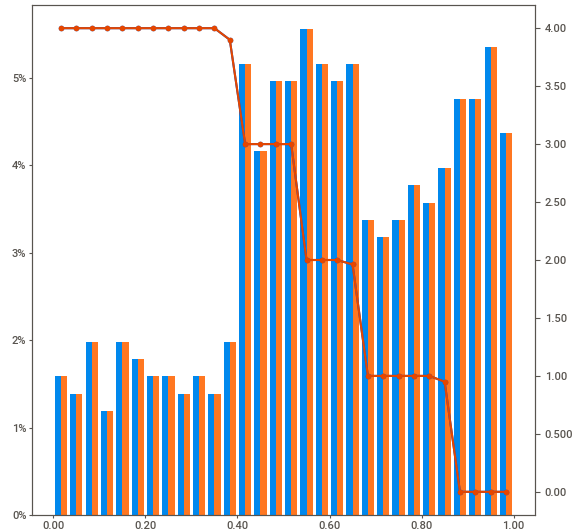
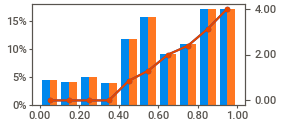
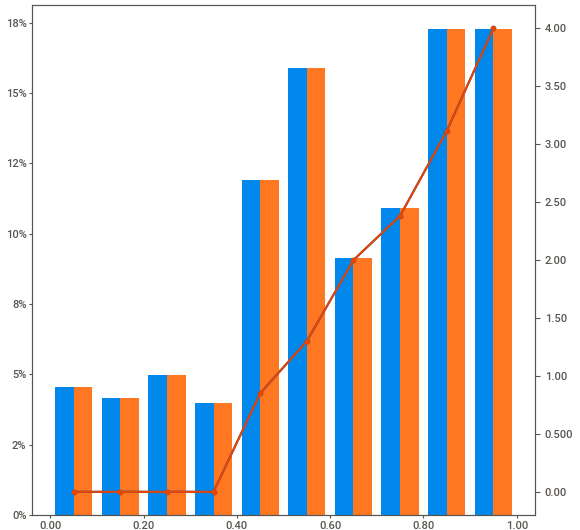
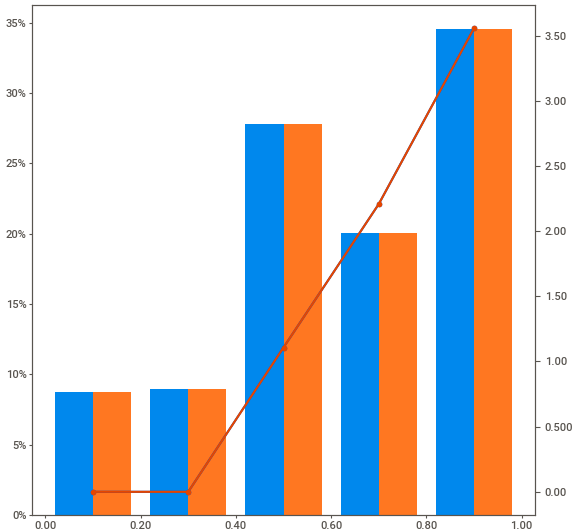
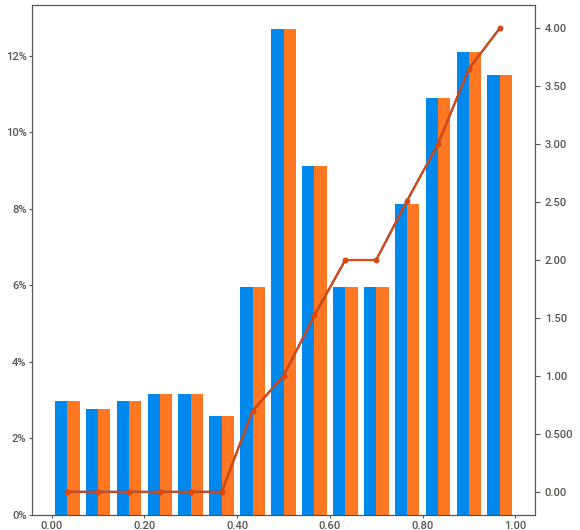
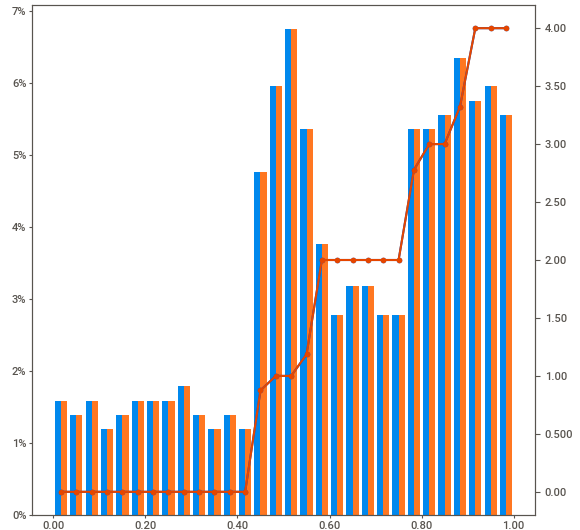
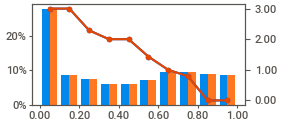
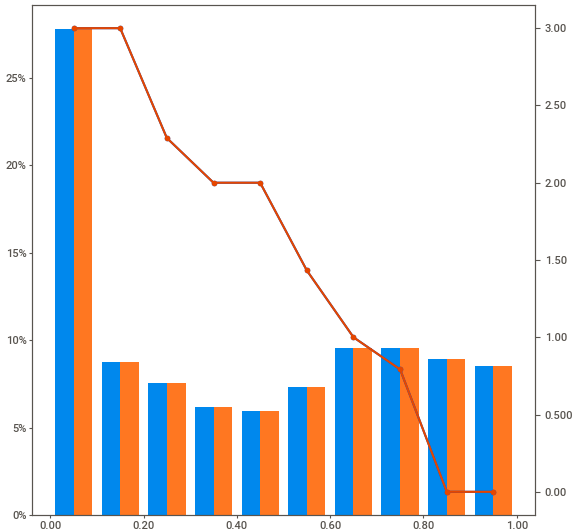
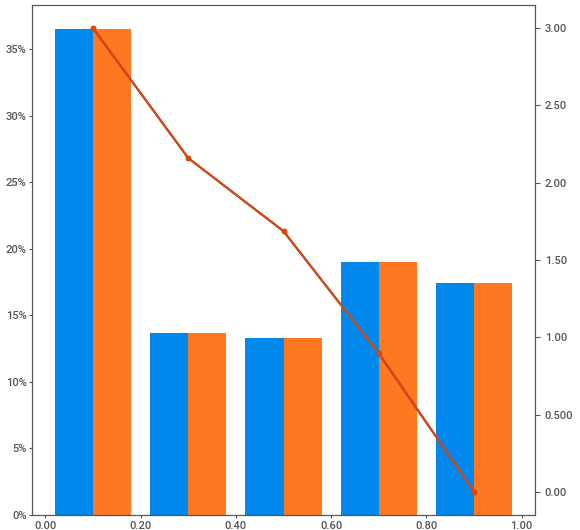
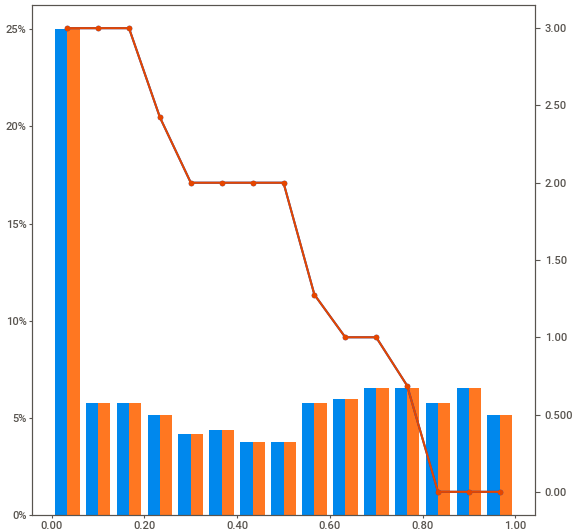
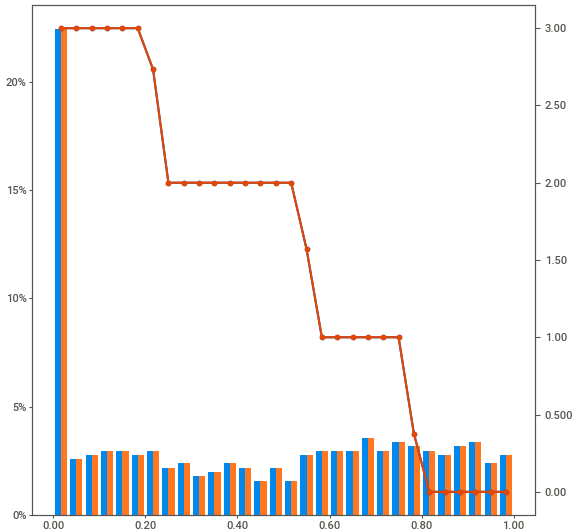
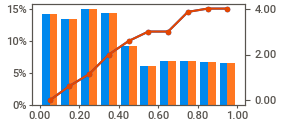
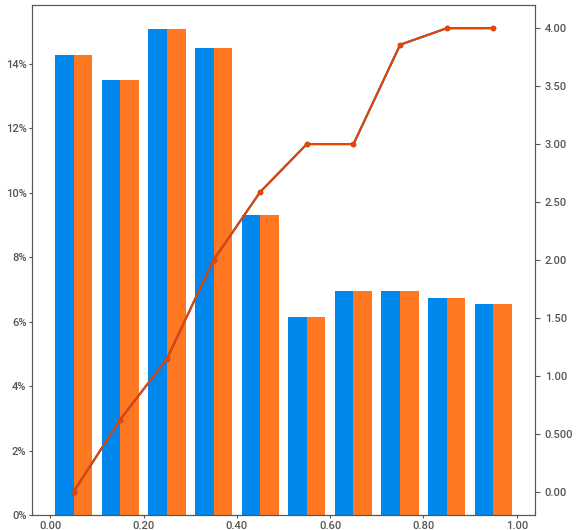
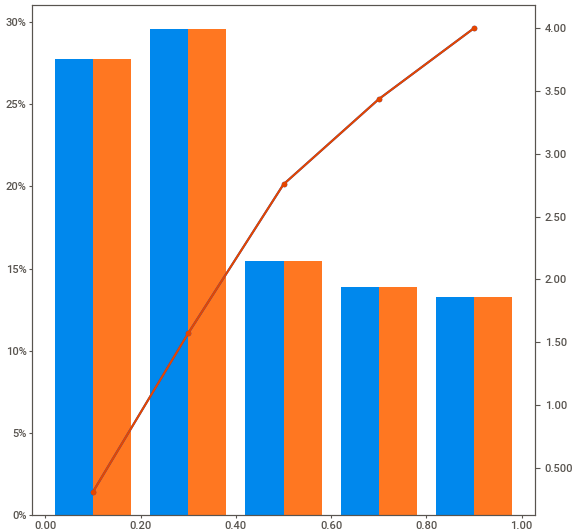
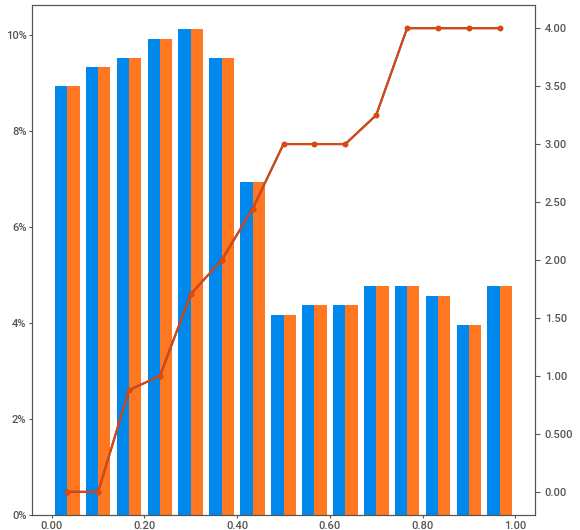
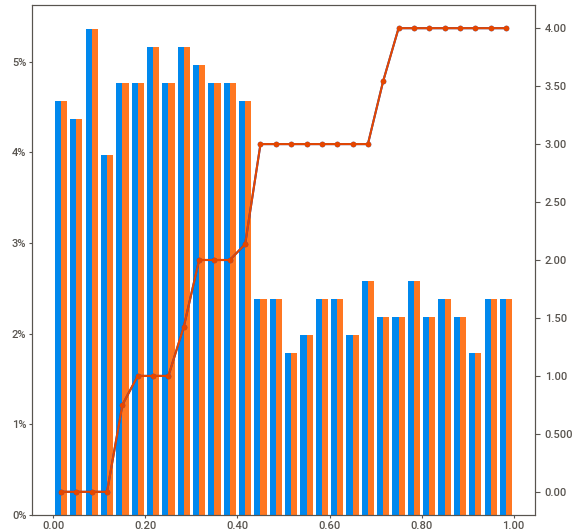
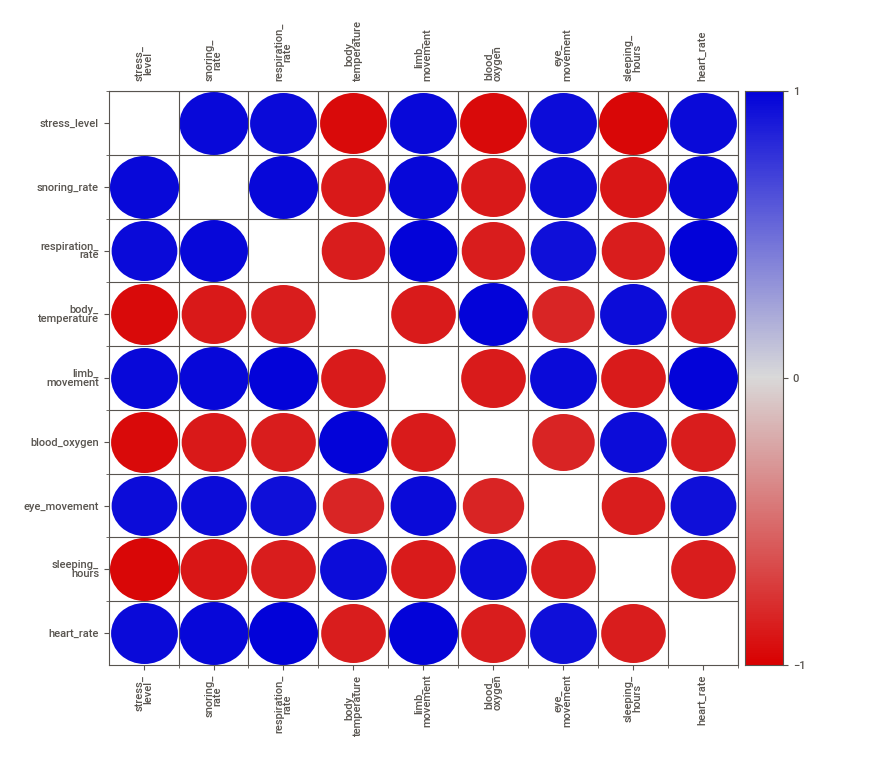
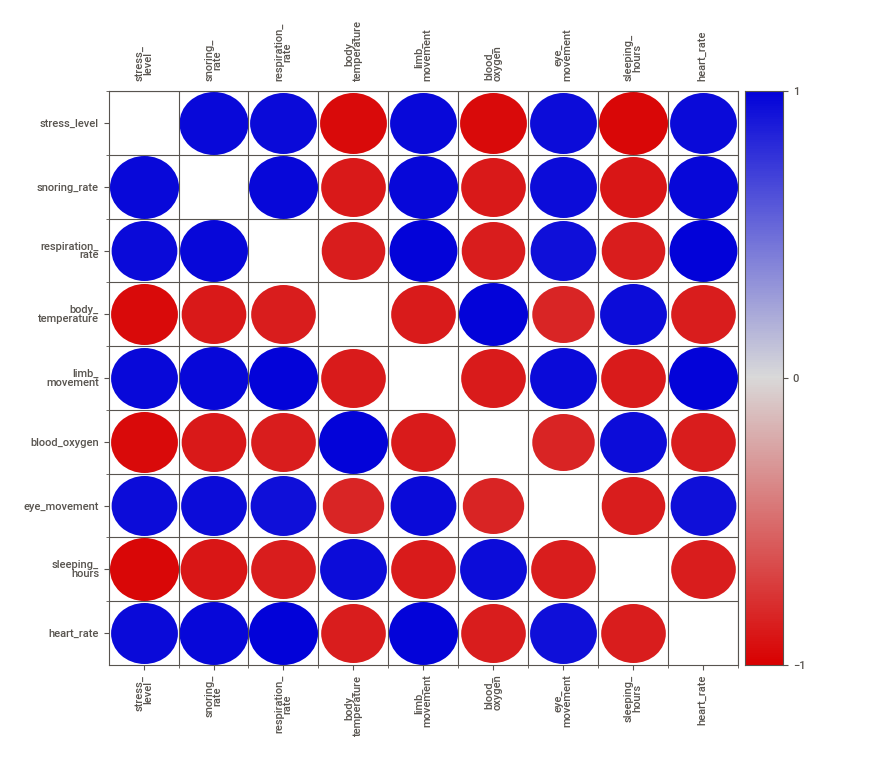

In [ ]:
feature_config = sv.FeatureConfig(force_num = ["stress_level"])

report = sv.compare([df_train, "Train"], [df_train, "Test"], 'stress_level', feature_config)
report.show_notebook()

#Modelling

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

##KNN

In [ ]:
# Model Algoritma KNN, k=3
from sklearn.neighbors import KNeighborsClassifier

modelknn = KNeighborsClassifier(n_neighbors=3)
modelknn.fit(x_train,y_train)
y_predknn = modelknn.predict(x_test)

print(classification_report(y_test,y_predknn))
print(confusion_matrix(y_test,y_predknn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

[[28  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 22  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 29]]


In [ ]:
# Model Algoritma KNN, k=5
from sklearn.neighbors import KNeighborsClassifier

modelknn = KNeighborsClassifier(n_neighbors=5)
modelknn.fit(x_train,y_train)
y_predknn = modelknn.predict(x_test)

print(classification_report(y_test,y_predknn))
print(confusion_matrix(y_test,y_predknn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

[[28  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 22  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 29]]


In [ ]:
# Model Algoritma KNN, k=7
from sklearn.neighbors import KNeighborsClassifier

modelknn = KNeighborsClassifier(n_neighbors=7)
modelknn.fit(x_train,y_train)
y_predknn = modelknn.predict(x_test)

print(classification_report(y_test,y_predknn))
print(confusion_matrix(y_test,y_predknn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

[[28  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 22  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 29]]


##DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modeldtree = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=3,
                                    splitter='best',
                                    random_state=0)
modeldtree.fit(x_train,y_train)
y_preddecisiontree = modeldtree.predict(x_test)

print(classification_report(y_test,y_preddecisiontree))
print(confusion_matrix(y_test,y_preddecisiontree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

[[28  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  1 21  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 29]]


In [ ]:
#save the feature name and target variables
feature_names = x.columns
labels = y.unique()

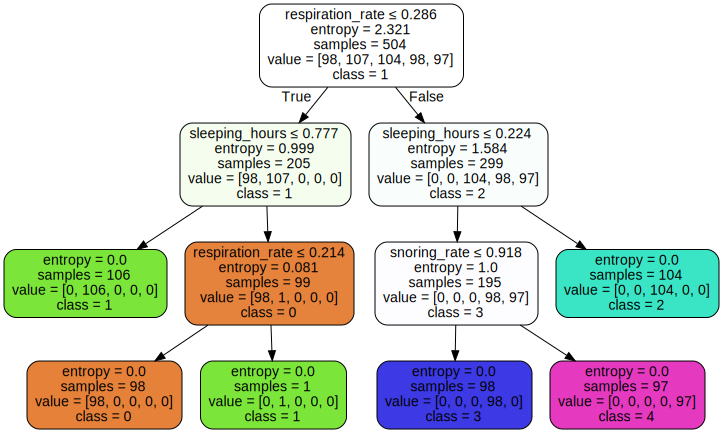

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(modeldtree,
                      out_file=None, 
                      feature_names=feature_names,  
                      class_names=['0','1','2','3','4'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

##SVM

In [ ]:
from sklearn.svm import SVC

modelsvm = SVC(decision_function_shape= 'ovo')
modelsvm.fit(x_train,y_train)

SVC(decision_function_shape='ovo')

In [ ]:
y_predsvm = modelsvm.predict(x_test)
print(classification_report(y_test,y_predsvm))
print(confusion_matrix(y_test,y_predsvm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

[[28  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 22  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 29]]
